# HW5-5

the two details the manager needs to specify are: 
- the measure to use in accuracy for the resulting clustering structure
- How many variables to choose? or specify attribute to cluster

Reasons for the two details:
- Irrelevant attributes may adversely affect the outcome
- When more variables are chosen, interpretation is less clear
- results might be different when using different measure (SSE or silhouette score)

Describe one major flaw with the approach:
- it is hard to figure out whether to use supervised or unsupervised measure since we do not know the class label.
- the result will be dependent on the supervised or unsupervised measure since the method are different

# HW5-6

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

# Projects digits to embedded space
digits = load_digits()
digits.data.shape
tsne = TSNE(n_components=2)
xt = tsne.fit_transform(digits.data)

/Users/chriz_yu/opt/anaconda3/envs/CSE801/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/chriz_yu/opt/anaconda3/envs/CSE801/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [3]:
digits.data.shape

(1797, 64)

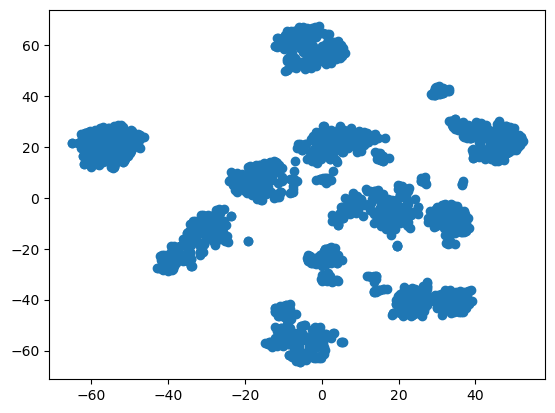

In [4]:
plt.scatter(xt[:,0],xt[:,1])
plt.show()

1165161.2804296855


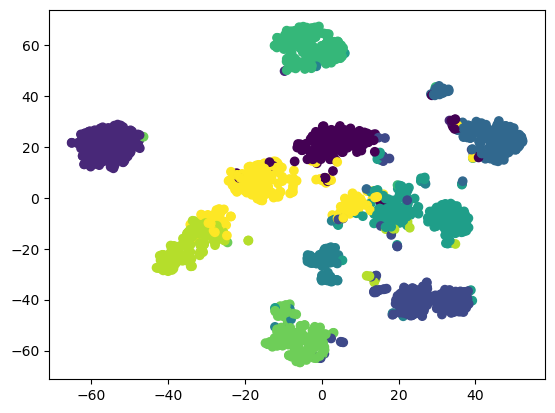

In [5]:
# Apply K-Means clustering with 10 cluster and visualize the clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(digits.data)
y_kmeans = kmeans.predict(digits.data)
print(kmeans.inertia_)
plt.scatter(xt[:,0],xt[:,1],c=y_kmeans)
plt.show()

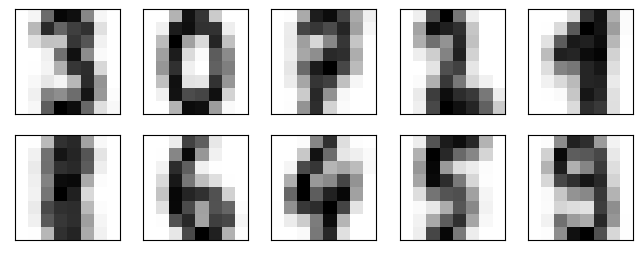

In [6]:
# Visualize cluster centroids
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

# HW 5-6

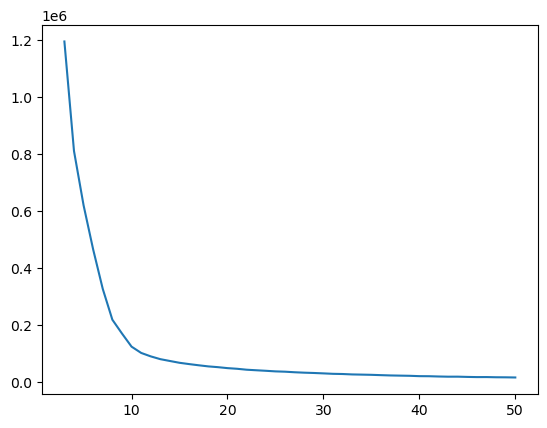

In [7]:
# Calculates SSE (sum square error) for different number of clusters
error = list()
k = list()
for i in range(2,50):
    kmeans = KMeans(n_clusters=i+1)
    kmeans.fit(xt)
    error.append(kmeans.inertia_)
    k.append(i+1)
# Plots the error rate
plt.plot(k,error)
plt.show()

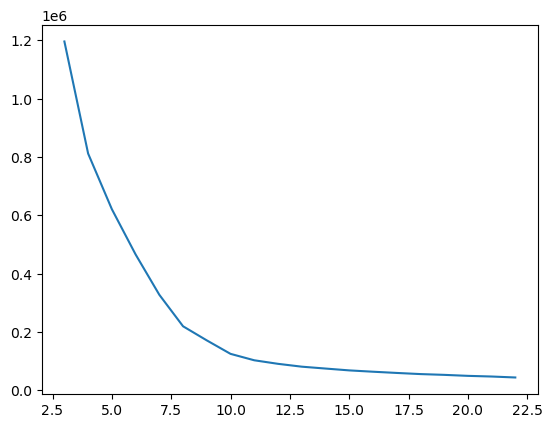

In [8]:
# zoom in
plt.plot(k[0:20],error[0:20])
plt.show()

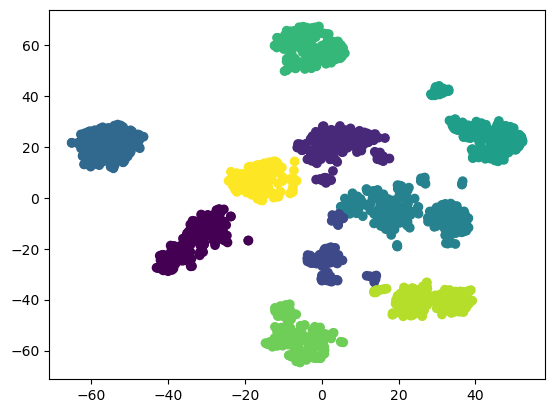

In [9]:
# Best k = 10 
KM = KMeans(10).fit(xt)

# plots the result
plt.scatter(xt[:,0],xt[:,1],c=KM.labels_)
plt.show()

In [10]:
# Calculates silhouette score for current cluster assignment
from sklearn import metrics
score = metrics.silhouette_score(digits.data, y_kmeans, metric='euclidean')
score

0.18240470506873496

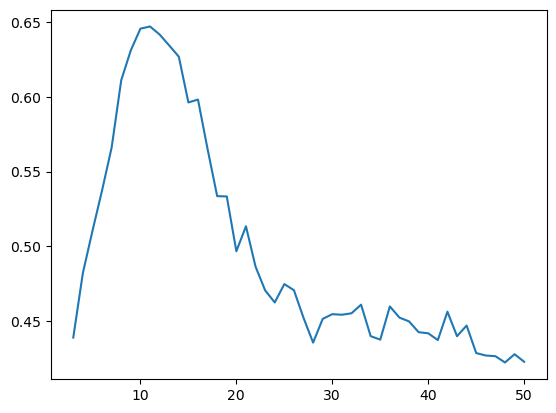

In [11]:
# Calculates silhouette score for different number of clusters
SS = list()
k = list()
for i in range(2,50):
    KM = KMeans(n_clusters=i+1)
    KM.fit(xt)
    SS.append(metrics.silhouette_score(xt, KM.labels_, metric='euclidean'))
    k.append(i+1)

# Plots the error rate
plt.plot(k,SS)
plt.show()

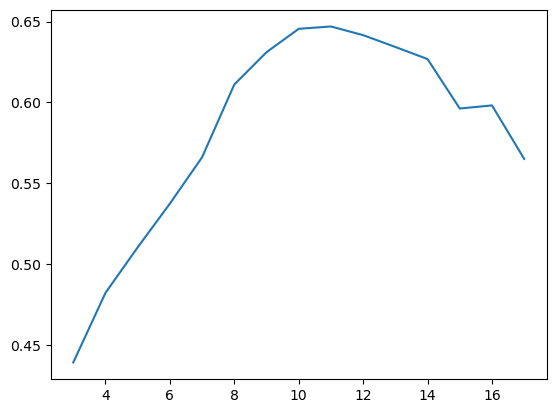

In [12]:
# zoom in
plt.plot(k[0:15],SS[0:15])
plt.show()

In [13]:
# best silhouette score cluster 
best = k[SS.index(max(SS))]
best

11

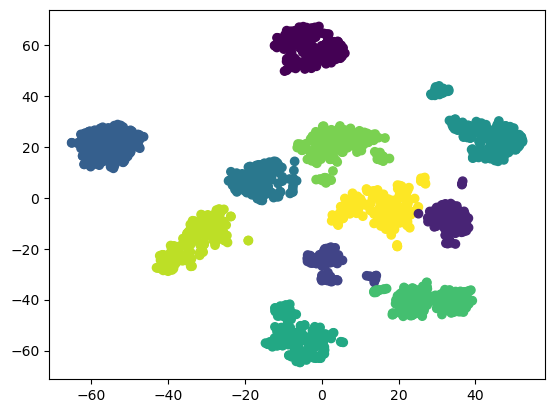

In [14]:
# k-means for the selected k
KM = KMeans(best).fit(xt)

# plots the result
plt.scatter(xt[:,0],xt[:,1],c=KM.labels_)
plt.show()